C:\Users\mathi\AppData\Local\Temp\ipykernel_18428\2558256012.py:5: DtypeWarning: Columns (0,11,19,21,24,25,27,32,33,36,37,38,39,40,46,47,48,49,51,53,55,56,60,73,75,78,80,82,83,86,87,91,95,99,102,103,104,107,108,109,110,111,112,113,116,118,119,120,121,122,123,124,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sap_storing_data_hu_project.csv')
C:\Users\mathi\AppData\Local\Temp\ipykernel_18428\2558256012.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['stm_aanntpl_tijd'] = pd.to_datetime(df['stm_aanntpl_tijd'], errors='coerce')


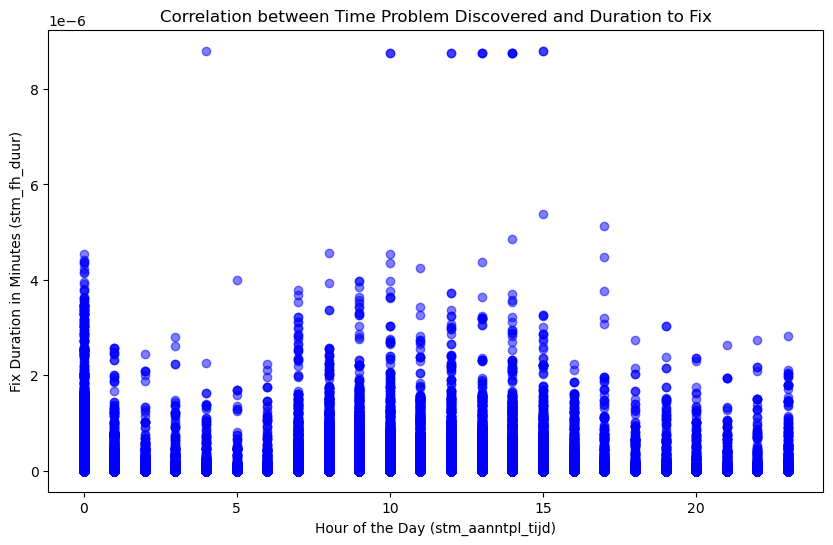

Correlation coefficient (Hour vs. Duration): -0.007663657290677109


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('sap_storing_data_hu_project.csv')

# Convert 'stm_aanntpl_tijd' to datetime
df['stm_aanntpl_tijd'] = pd.to_datetime(df['stm_aanntpl_tijd'], errors='coerce')

# Extract features from 'stm_aanntpl_tijd' (e.g., hour of the day) or convert to UNIX timestamp
# Option 1: Use hour of the day to look for daily patterns
df['stm_aanntpl_hour'] = df['stm_aanntpl_tijd'].dt.hour

# Option 2: Use UNIX timestamp if you want to check time as a continuous variable
# df['stm_aanntpl_timestamp'] = df['stm_aanntpl_tijd'].view('int64') // 10**9

# Convert 'stm_fh_duur' to a numeric duration (assume it's in hh:mm:ss format)
df['stm_fh_duur'] = pd.to_timedelta(df['stm_fh_duur'], errors='coerce')
df['stm_fh_duur_minutes'] = df['stm_fh_duur'].dt.total_seconds() / 60  # Convert duration to minutes

# Drop rows with NaNs (optional)
df.dropna(subset=['stm_aanntpl_hour', 'stm_fh_duur_minutes'], inplace=True)

# Plot (using hour of the day vs. fix duration in minutes)
plt.figure(figsize=(10, 6))
plt.scatter(df['stm_aanntpl_hour'], df['stm_fh_duur_minutes'], alpha=0.5, color='b')
plt.title('Correlatie tussen tijd van aanwezigheid aannemer en hoe lang functieherstel duurt')
plt.xlabel('H(stm_aanntpl_tijd)')
plt.ylabel('(stm_fh_duur)')
plt.show()

# Calculate correlation coefficient
correlation = df['stm_aanntpl_hour'].corr(df['stm_fh_duur_minutes'])
print(f'Correlation coefficient (Hour vs. Duration): {correlation}')